# Multi-linear Regression

Multiple Linear Regression is a statistical method used to model the relationship between a dependent variable and two or more independent variables. 

It's an extension of simple linear regression, where the goal is to find the best-fitting linear equation that explains the relationship between the dependent variable and multiple independent variables.

### EDA on 50_Startups Dataset 

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

df = pd.read_csv("50_Startups.csv")
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
# Check the dimensions of dataset

df.shape

(50, 5)

In [4]:
# Check data types of each column

df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
# Information of complete dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# Check unique values of State

df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
# Check for missing values

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no null values in the dataset

In [8]:
# Check for duplicate values

df.duplicated().sum()

0

There are no duplicate values in the dataset

In [9]:
# Calculate summary statistics

df.describe(include= 'all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


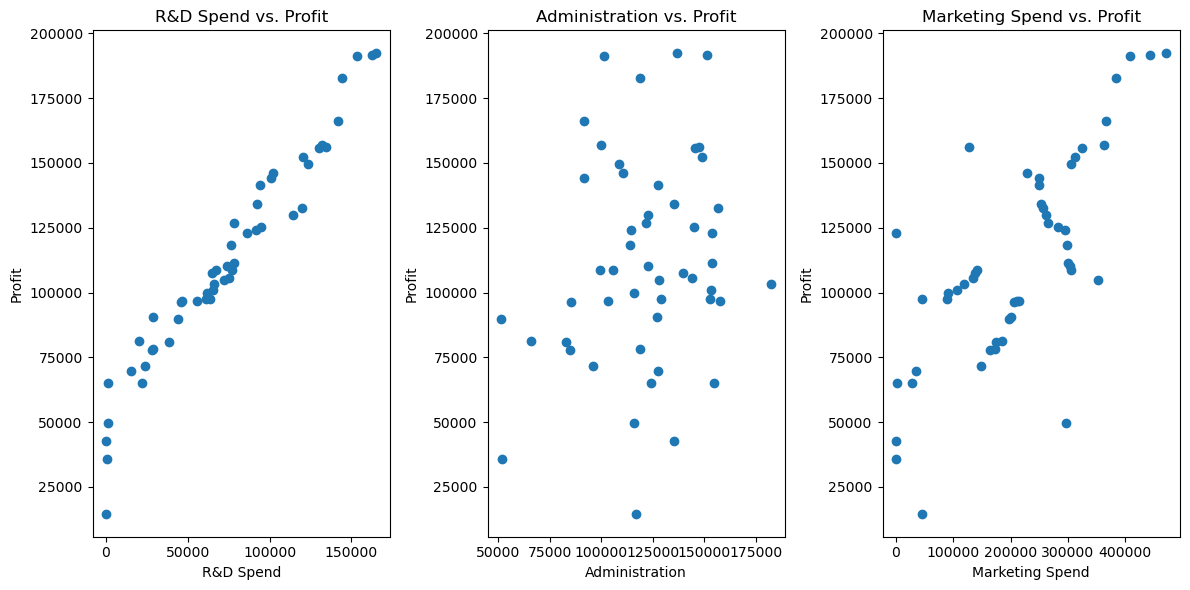

In [10]:
# Data Visualization

plt.figure(figsize=(12, 6))

# Scatter plot for R&D Spend vs Profit
plt.subplot(1, 3, 1)
plt.scatter(df["R&D Spend"], df["Profit"])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D Spend vs. Profit")

# Scatter plot for Administration vs Profit
plt.subplot(1, 3, 2)
plt.scatter(df["Administration"], df["Profit"])
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Administration vs. Profit")

# Scatter plot for Marketing Spend vs Profit
plt.subplot(1, 3, 3)
plt.scatter(df["Marketing Spend"], df["Profit"])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.title("Marketing Spend vs. Profit")

plt.tight_layout()
plt.show()

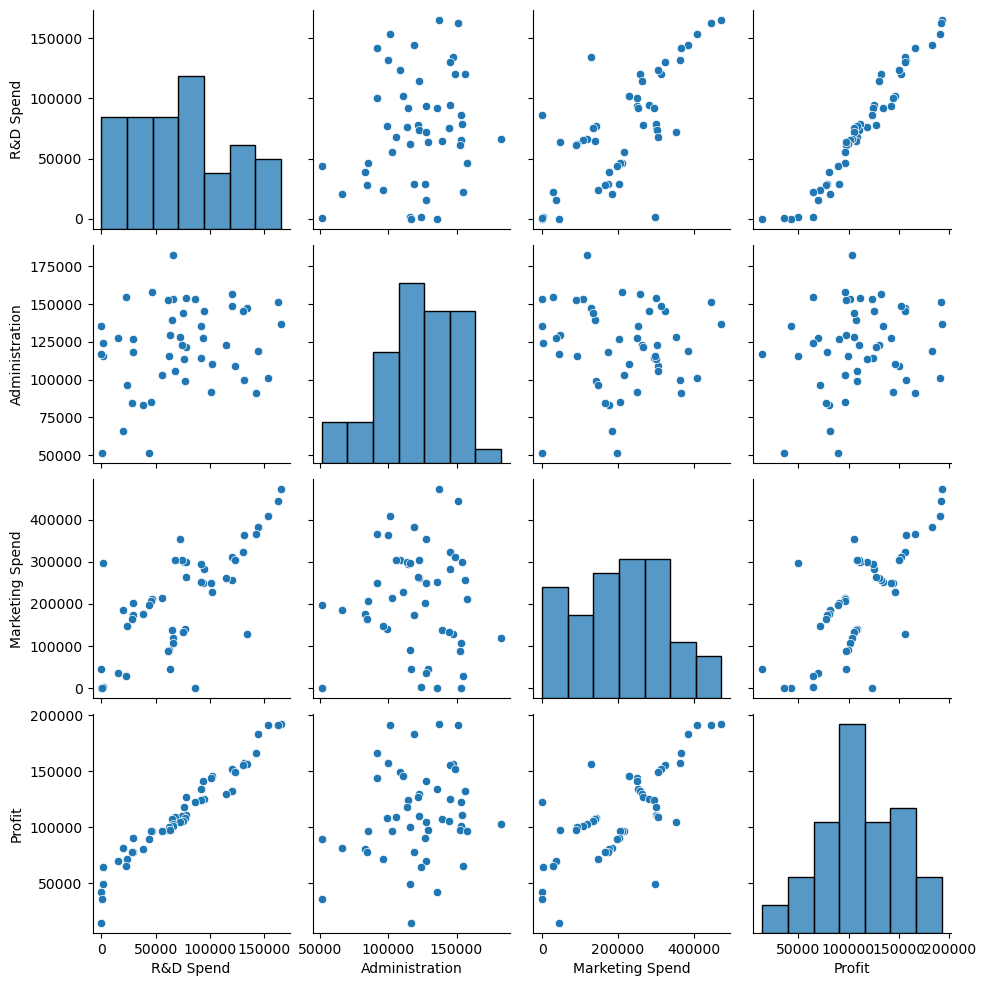

In [11]:
# Data Visualization of complete dataset using pairplot

sns.pairplot(df)
plt.show()

#### Data Preprocessing

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
# Dummy Encoding for the categorical variable "State"

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [14]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [15]:
# Avoiding the dummy variable trap

X = X[:, 1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

### Building the Multi-linear Regression Model

In [16]:
# Importing the necessary libraries to build a model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.41, random_state=42)

In [18]:
# Model Fitting

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Model Prediction

y_pred = model.predict(X_test)
print(y_pred)

[127084.69486951  86715.18266755  99972.40287965  46655.42849262
 128590.85849256  52989.15492938 109348.46533628 101198.42889957
  98272.54088148 112329.84855951 129411.34879176 175091.37788136
  94784.55529357 149913.099238   174068.56422353 156238.19923794
  77825.27308169  57779.0925455   45415.37455494 145960.85954689
 156355.99883975]


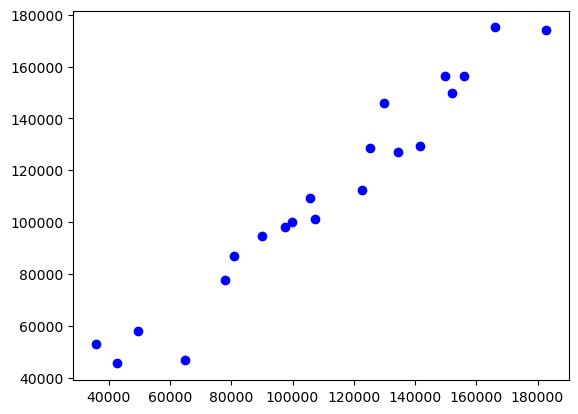

In [20]:
# Visualization of Predictions

plt.scatter(y_test, y_pred, color='blue')
plt.show()

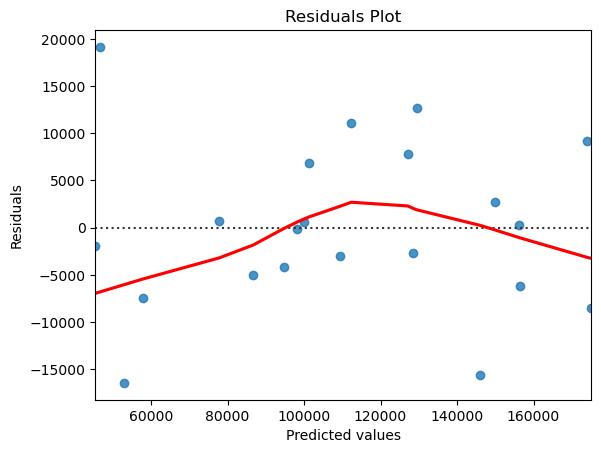

In [21]:
# Residuals Plot

residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [22]:
# Comparing the results

comparision = pd.DataFrame()
comparision['Actual'] = y_test
comparision['predicted'] = y_pred
comparision

,Actual,predicted
0,134307.35,127084.694870
1,81005.76,86715.182668
2,99937.59,99972.402880
3,64926.08,46655.428493
4,125370.37,128590.858493
5,35673.41,52989.154929
6,105733.54,109348.465336
7,107404.34,101198.428900
8,97427.84,98272.540881
9,122776.86,112329.848560


In [23]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error = ", mse)
print("R-squared = ", r2)

Mean Squared Error =  76294133.42804366
R-squared =  0.9537951650844234


Therefore, 95.4% of the variability in the dependent variable ("Profit") is explained by the independent variables ("R&D Spend", "Administration", "Marketing Spend", and "State") using the multiple linear regression model.

In other words, the multiple linear regression model explains about 95.4% of the variance in profits based on the given independent variables. This is a high R-squared value, suggesting that the model is fitting the data very well and is able to explain a significant amount of the variability in profits.

In [24]:
# Predict using new data
new_data = pd.DataFrame({
    'R&D Spend': [123456],
    'Administration': [789012],
    'Marketing Spend': [345678],
    'State': ['New York']  # Make sure to use the correct categorical value
})

# Transform new data using the same ColumnTransformer and model
new_data_transformed = np.array(ct.transform(new_data))
new_data_transformed = new_data_transformed[:, 1:]  # Avoid dummy variable trap

# Make predictions for the new data
new_prediction = model.predict(new_data_transformed)
print("Predicted Profit for New Data:", new_prediction[0])

Predicted Profit for New Data: 93534.88852635333


In [25]:
# Predict using new data
new_data = pd.DataFrame({
    'R&D Spend': [123456],
    'Administration': [789012],
    'Marketing Spend': [345678],
    'State': ['California']  # Make sure to use the correct categorical value
})

# Transform new data using the same ColumnTransformer and model
new_data_transformed = np.array(ct.transform(new_data))
new_data_transformed = new_data_transformed[:, 1:]  # Avoid dummy variable trap

# Make predictions for the new data
new_prediction = model.predict(new_data_transformed)
print("Predicted Profit for New Data:", new_prediction[0])

Predicted Profit for New Data: 94209.04356468025


In [26]:
# Predict using new data
new_data = pd.DataFrame({
    'R&D Spend': [123456],
    'Administration': [789012],
    'Marketing Spend': [345678],
    'State': ['Florida']  # Make sure to use the correct categorical value
})

# Transform new data using the same ColumnTransformer and model
new_data_transformed = np.array(ct.transform(new_data))
new_data_transformed = new_data_transformed[:, 1:]  # Avoid dummy variable trap

# Make predictions for the new data
new_prediction = model.predict(new_data_transformed)
print("Predicted Profit for New Data:", new_prediction[0])

Predicted Profit for New Data: 94360.97634604173


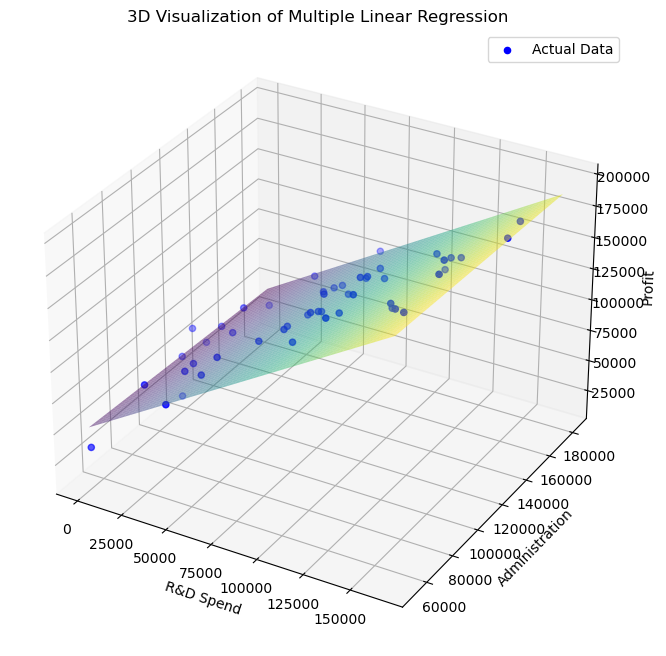

In [27]:
# 3D Visualization

from mpl_toolkits.mplot3d import Axes3D

# Prepare the data
X = df[["R&D Spend", "Administration"]]
y = df["Profit"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Create a meshgrid for 3D plot
x_range = np.linspace(min(X["R&D Spend"]), max(X["R&D Spend"]), 50)
y_range = np.linspace(min(X["Administration"]), max(X["Administration"]), 50)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
Z_pred = model.predict(np.c_[X_mesh.ravel(), Y_mesh.ravel()])
Z_mesh = Z_pred.reshape(X_mesh.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X["R&D Spend"], X["Administration"], y, color="blue", label="Actual Data")
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, alpha=0.5, cmap="viridis")
ax.set_xlabel("R&D Spend")
ax.set_ylabel("Administration")
ax.set_zlabel("Profit")
ax.set_title("3D Visualization of Multiple Linear Regression")
plt.legend()
plt.show()
